In [4]:
import pandas as pd
df=pd.read_csv("dataset_tomat.csv")
df

,Harga,Hari,Cuaca,Promo,Total_Penjualan
0,8000,Senin,Cerah,Tidak,92
1,7500,Senin,Berawan,Tidak,88
2,12000,Selasa,Hujan,Ya,105
3,9500,Selasa,Mendung,Tidak,70
4,7000,Rabu,Cerah,Tidak,98
...,...,...,...,...,...
90,7000,Jumat,Mendung,Tidak,80
91,6500,Sabtu,Cerah,Ya,178
92,11200,Sabtu,Cerah,Tidak,130
93,11500,Minggu,Cerah,Tidak,138


In [5]:
df.shape


(95, 5)

In [6]:
df.head()


,Harga,Hari,Cuaca,Promo,Total_Penjualan
0,8000,Senin,Cerah,Tidak,92
1,7500,Senin,Berawan,Tidak,88
2,12000,Selasa,Hujan,Ya,105
3,9500,Selasa,Mendung,Tidak,70
4,7000,Rabu,Cerah,Tidak,98


In [7]:
df.tail()

,Harga,Hari,Cuaca,Promo,Total_Penjualan
90,7000,Jumat,Mendung,Tidak,80
91,6500,Sabtu,Cerah,Ya,178
92,11200,Sabtu,Cerah,Tidak,130
93,11500,Minggu,Cerah,Tidak,138
94,8200,Minggu,Hujan,Tidak,88


In [8]:
df.describe()

,Harga,Total_Penjualan
count,95.000000,95.000000
mean,9217.894737,110.810526
std,1771.042423,29.813711
min,6200.000000,60.000000
25%,7800.000000,88.000000
50%,9000.000000,102.000000
75%,10650.000000,135.000000
max,13000.000000,178.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Harga            95 non-null     int64 
 1   Hari             95 non-null     object
 2   Cuaca            95 non-null     object
 3   Promo            95 non-null     object
 4   Total_Penjualan  95 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.8+ KB


In [10]:
df.dtypes

Harga               int64
Hari               object
Cuaca              object
Promo              object
Total_Penjualan     int64
dtype: object

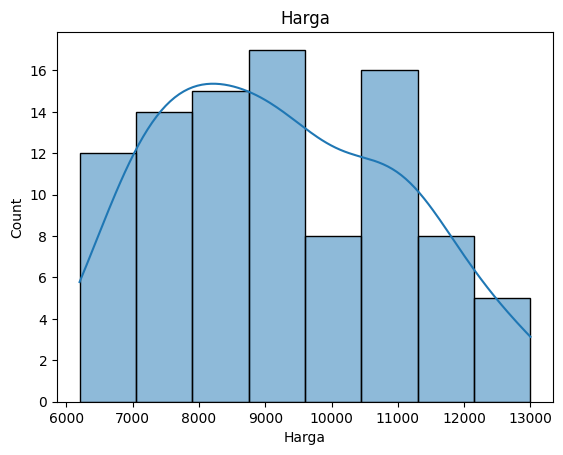

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.histplot(df["Harga"], kde=True)
plt.title("Harga")
plt.show()

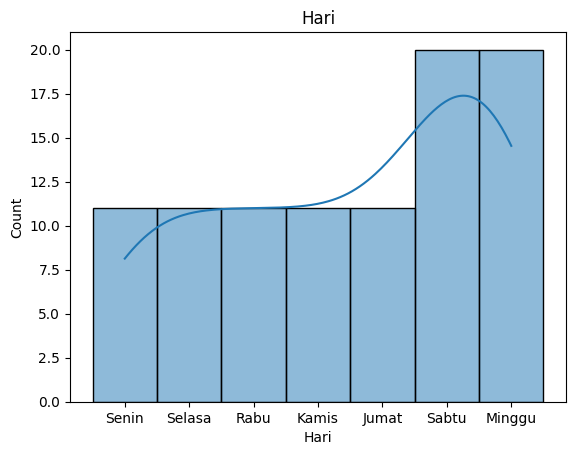

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.histplot(df["Hari"], kde=True)
plt.title("Hari")
plt.show()

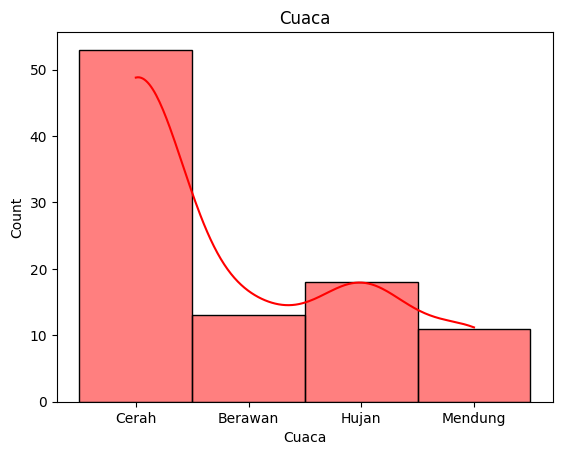

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.histplot(df["Cuaca"], kde=True, color="red")
plt.title("Cuaca")
plt.show()

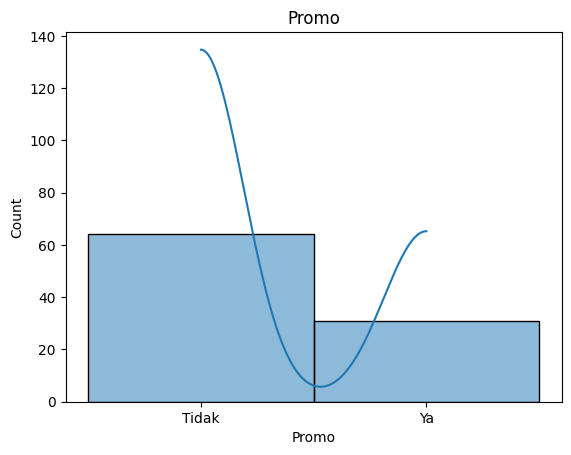

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.histplot(df["Promo"], kde=True)
plt.title("Promo")
plt.show()

In [15]:
skew_val=df["Harga"].skew()
print(skew_val)

0.28943257774436654


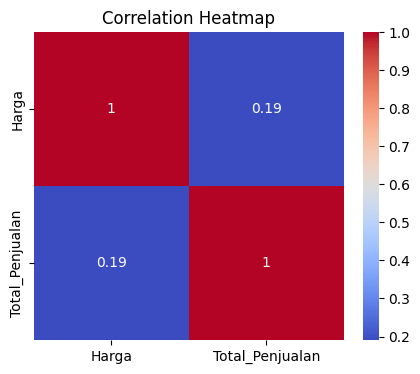

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns

num_features = ['Harga', 'Total_Penjualan']#hanya kolom numerik 

plt.figure(figsize=(5,4))
sns.heatmap(df[num_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn. compose import ColumnTransformer

X=df[["Harga", "Hari", "Cuaca", "Promo"]]
y=df["Total_Penjualan"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_columns=["Harga"]
categorical_columns=[ "Hari", "Cuaca", "Promo"]

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(), categorical_columns)
    ]
)

model1=Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", LinearRegression())
    ]
)

model1.fit(X_train, y_train)
y_pred=model1.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE Score:", mean_absolute_error(y_test, y_pred))
print("MSE Score:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9064850021301094
MAE Score: 8.17094197803115
MSE Score: 108.1354590327067


In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["Harga", "Hari", "Cuaca", "Promo"]]
y = df["Total_Penjualan"]

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42
)

numeric_columns=["Harga"]
categorical_columns=[ "Hari", "Cuaca", "Promo"]

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(), categorical_columns)
    ]
)

model_tree2 = Pipeline(
 steps=[
 ("preprocessing", preprocessing),
 ("model", DecisionTreeRegressor(random_state=42, max_depth=6))
 # supaya tidak terus berubah saat di-run, tambahkan random_state=42
 # supaya tidak overfitting, tambahkan max_depth misal 5
 ]
)

model_tree2.fit(X_train, y_train)
y_pred = model_tree2.predict(X_test)


print("R2 Score :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE Score:", mean_squared_error(y_test, y_pred))

R2 Score : 0.8056833077807589
MAE : 9.463157894736844
MSE Score: 224.69684210526316


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["Harga", "Hari", "Cuaca", "Promo"]]
y = df["Total_Penjualan"]

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42
)

numeric_columns=["Harga"]
categorical_columns=[ "Hari", "Cuaca", "Promo"]

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(), categorical_columns)
    ]
)

model_random = Pipeline(
 steps=[
 ("preprocessing", preprocessing),
 ("model", RandomForestRegressor(random_state=42, max_depth=6))
 ]
)

model_random.fit(X_train, y_train)
y_pred = model_random.predict(X_test)


print("R2 Score :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE Score:", mean_squared_error(y_test, y_pred))

R2 Score : 0.9560047462882524
MAE : 5.137646580891024
MSE Score: 50.87362523388349


In [20]:
from sklearn. model_selection import cross_val_score

scores = cross_val_score(model_random, X_train, y_train, cv=5, scoring="r2")
print("Scores :", scores)
print("\nMean Scores :", scores.mean())

Scores : [0.90913251 0.94418754 0.80803734 0.93681458 0.91498963]

Mean Scores : 0.9026323194235084


In [23]:
data_baru=pd.DataFrame([[9990, "Minggu", "Cerah", "Tidak"]],
                       columns=["Harga", "Hari", "Cuaca", "Promo"])
prediksi = model_random.predict(data_baru)[0]
print(f"Model memprediksi total penjualan Tomat: {prediksi:.0f}")

Model memprediksi total penjualan Tomat: 139


In [22]:
import joblib 

joblib.dump(model_random, "model_random_tomat.joblib")

['model_random_tomat.joblib']